### Q1 - Effect Size of Cohen's D (Ch 2)

In [1]:
# package imports
import thinkstats2
import thinkplot
import nsfg
import math

%matplotlib inline

In [2]:
# read in data
preg = nsfg.ReadFemPreg()
first = preg[preg.birthord ==1]
other = preg[preg.birthord != 1]

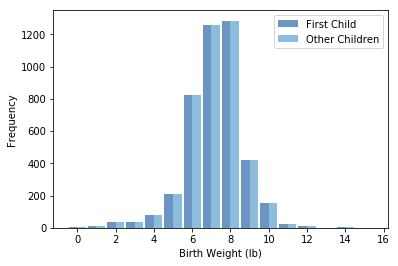

In [3]:
# create histogram. numbers are rounded to the nearest whole
fh = thinkstats2.Hist(first['totalwgt_lb'].apply(lambda x: round(x,0)), label='First Child')
oh = thinkstats2.Hist(first['totalwgt_lb'].apply(lambda x: round(x,0)), label='Other Children')

wd = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(fh, align='right', width = wd)
thinkplot.Hist(oh, align='left', width = wd)
thinkplot.Show(xlabel='Birth Weight (lb)', ylabel='Frequency')

In [4]:
# calculate Cohen's D
fm = first.totalwgt_lb.mean()
om = other.totalwgt_lb.mean()
wgtco = thinkstats2.CohenEffectSize(first.totalwgt_lb, other.totalwgt_lb)
lgtco = thinkstats2.CohenEffectSize(first.prglngth, other.prglngth)
effectmag = math.fabs(wgtco / lgtco)

print('First Child Mean Weight (lb): ', fm)
print('Other Children Mean Weight (lb): ', om)
print('Cohen Effect Size: ', wgtco)
print('The effect size on weight is %.3f times that of on pregnancy length.' % effectmag)

First Child Mean Weight (lb):  7.201094430437772
Other Children Mean Weight (lb):  7.325855614973262
Cohen Effect Size:  -0.08893641177719079
The effect size on weight is 0.081 times that of on pregnancy length.


### Q2 - Actual vs. Biased Sample (Ch 3)

In [5]:
# import data and generate pmf
from probability import BiasPmf

resp = nsfg.ReadFemResp()

actual = thinkstats2.Pmf(resp['numkdhh'], 'Actual')
survey = BiasPmf(actual, 'Survey Bias')

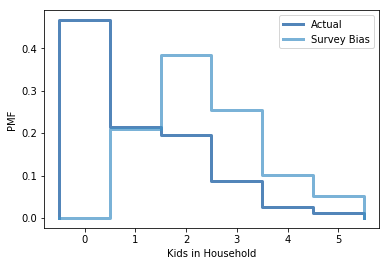

In [6]:
# plot pmf
thinkplot.PrePlot(2)
thinkplot.Pmfs([actual, survey])
thinkplot.Show(xlabel='Kids in Household', ylabel='PMF')

### Q3 - Random Distribution (Ch 4)

In [7]:
# generate random numbers
import random

rand = []

for i in range(1000):
    rand.append(random.random())

In [8]:
rp = thinkstats2.Pmf(rand, label='random.random pmf')
rc = thinkstats2.Cdf(rand, label='random.random cdf')

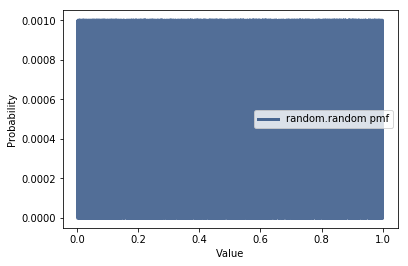

In [9]:
thinkplot.Pmf(rp)
thinkplot.Show(xlabel='Value', ylabel='Probability')

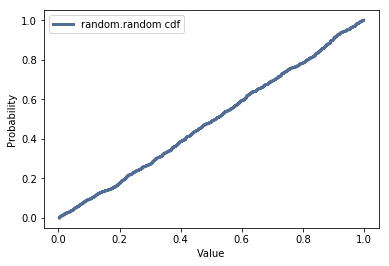

In [10]:
thinkplot.Cdf(rc)
thinkplot.Show(xlabel='Value', ylabel='Probability')

The PMF shows that all values in the range of `random.random()` have approximately equal chance of being selected.
The CDF shows that the cumulative probability linearly increases down the range.
Both these graphs indicate that the `random.random()` function is working as intended.

### Q4 - Normal Distribution of Blue Men (Ch 5)

In [11]:
# import and define distribution
from scipy.stats import norm
u = 178
std = 7.7

In [12]:
# unit conversion and calculation
minimum = (5 * 12 + 10) * 2.54
maximum = (6 * 12 + 1) * 2.54

print(norm.cdf(maximum, loc=u, scale=std) - norm.cdf(minimum, loc=u, scale=std))

0.34274683763147457


The estimate provided by the normal distribution indicates that approximately 34.3% of the male population is eligible to join the group based upon height.